原始图像尺寸：(512, 512)
第0八度处理完成，下一个八度输入尺寸：(256, 256)
第1八度处理完成，下一个八度输入尺寸：(128, 128)
第2八度处理完成，下一个八度输入尺寸：(64, 64)
第3八度处理完成，下一个八度输入尺寸：(32, 32)


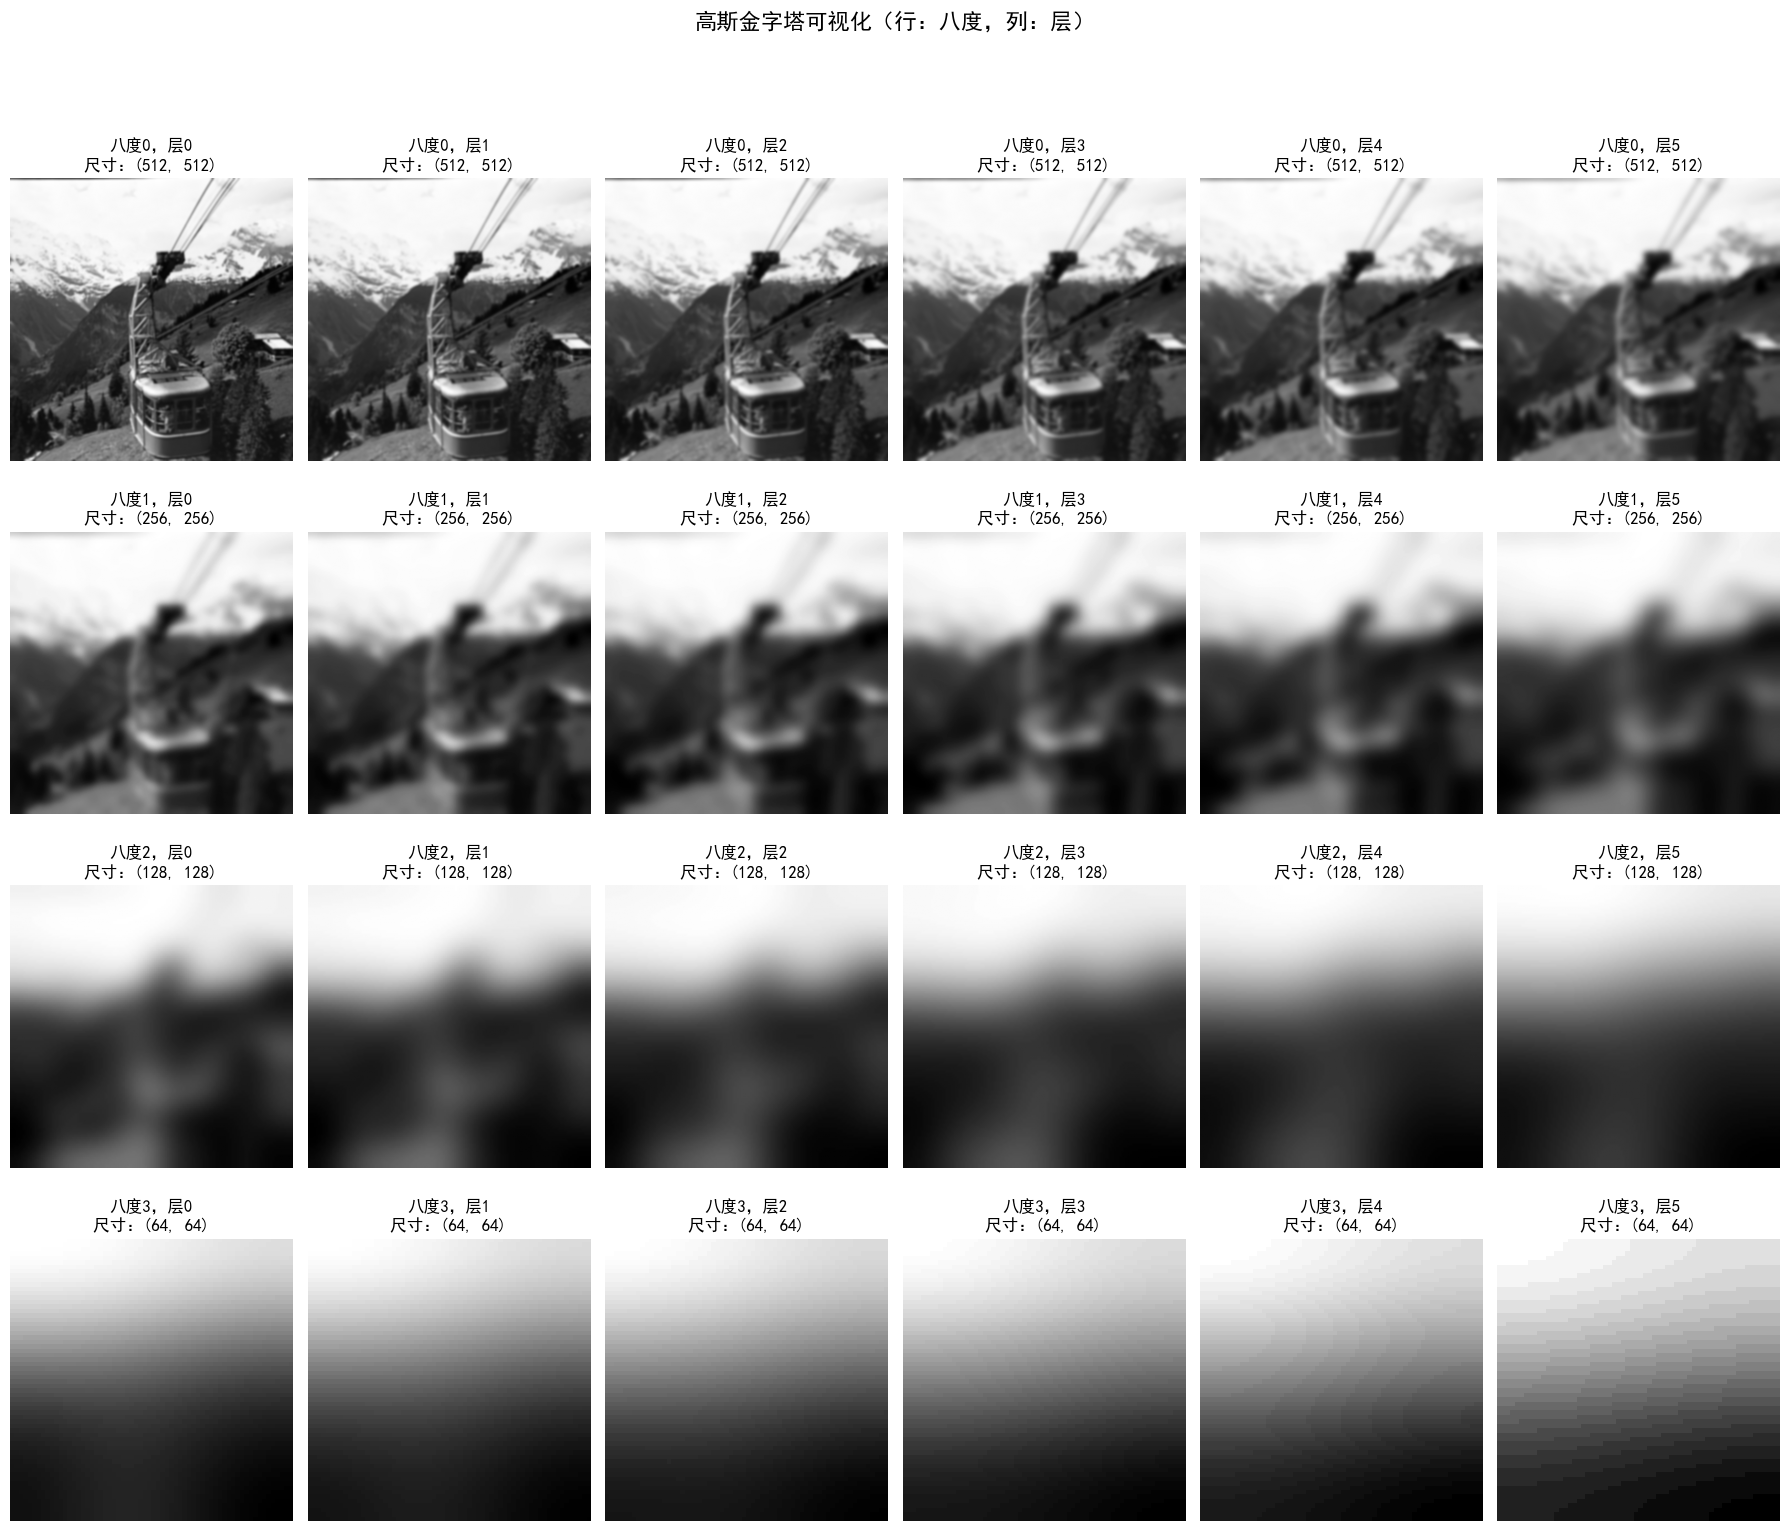

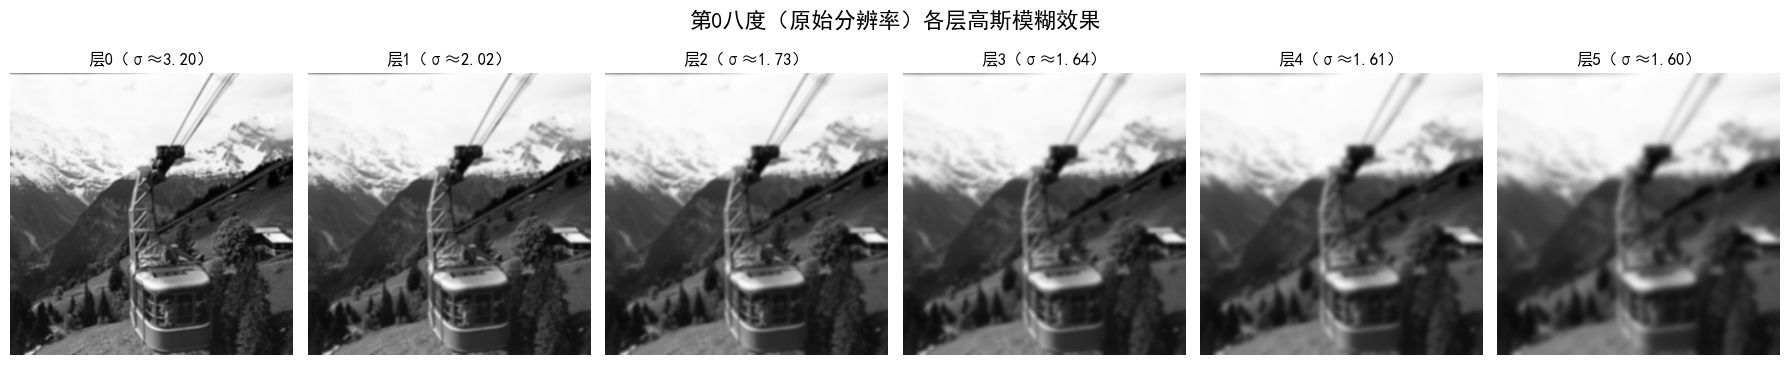

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 配置matplotlib中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# ---------------------- 步骤1：读取并预处理图像 ----------------------
img_path = "cablecar.jpg"
try:
    img = cv2.imread(img_path, 0)
except:
    img = np.zeros((512, 512), dtype=np.uint8)
    for i in range(0, 512, 64):
        for j in range(0, 512, 64):
            if (i//64 + j//64) % 2 == 0:
                img[i:i+64, j:j+64] = 255

img = cv2.resize(img, (512, 512))
print(f"原始图像尺寸：{img.shape}")

# ---------------------- 步骤2：定义高斯金字塔构建函数 ----------------------
def build_gaussian_pyramid(img, octaves=4, s=3, sigma0=1.6):
    gaussian_pyramid = []
    k = 2 ** (1 / s)

    for o in range(octaves):
        octave_gaussian = []
        current_sigma = sigma0 * (2 ** o)

        for i in range(s + 3):
            layer_sigma = current_sigma * (k ** i)
            ksize = int(6 * layer_sigma + 1)
            if ksize % 2 == 0:
                ksize += 1
            gaussian_img = cv2.GaussianBlur(img, (ksize, ksize), sigmaX=layer_sigma, sigmaY=layer_sigma)
            octave_gaussian.append(gaussian_img)

        gaussian_pyramid.append(octave_gaussian)

        img = octave_gaussian[s]
        img = img[::2, ::2]
        print(f"第{o}八度处理完成，下一个八度输入尺寸：{img.shape}")

    return gaussian_pyramid

# ---------------------- 步骤3：构建高斯金字塔 ----------------------
gaussian_pyramid = build_gaussian_pyramid(img, octaves=4, s=3, sigma0=1.6)

# ---------------------- 步骤4：可视化高斯金字塔 ----------------------
octaves = len(gaussian_pyramid)
layers_per_octave = len(gaussian_pyramid[0])

fig, axes = plt.subplots(octaves, layers_per_octave, figsize=(layers_per_octave*3, octaves*4))
fig.suptitle("高斯金字塔可视化（行：八度，列：层）", fontsize=16)

for o in range(octaves):
    for i in range(layers_per_octave):
        current_img = gaussian_pyramid[o][i]
        if octaves == 1:
            ax = axes[i]
        elif layers_per_octave == 1:
            ax = axes[o]
        else:
            ax = axes[o, i]
        ax.imshow(current_img, cmap="gray")
        ax.set_title(f"八度{o}，层{i}\n尺寸：{current_img.shape}")
        ax.axis("off")

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# ---------------------- 步骤5：额外：提取单个八度/层查看细节 ----------------------
octave_0 = gaussian_pyramid[0]
fig, axes = plt.subplots(1, len(octave_0), figsize=(18, 4))
fig.suptitle("第0八度（原始分辨率）各层高斯模糊效果", fontsize=16)

for i, layer in enumerate(octave_0):
    axes[i].imshow(layer, cmap="gray")
    axes[i].set_title(f"层{i}（σ≈{1.6*(2**(1/3)**i):.2f}）")
    axes[i].axis("off")

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()